In [1]:
VERSION = 31
CLOUD_SINGLE = True
DATA_SMALL = False
FOCAL_LOSS = False

In [2]:
%run ./Code.ipynb

In [6]:
train_csv = pd.read_csv(PATH/'stage_2_train.csv')

train_csv = train_csv.loc[~train_csv.ID.duplicated()].sort_values('ID').reset_index(drop=True)

In [19]:
all_sop_ids = train_csv.ID.str.split('_').apply(lambda x: x[0]+'_'+x[1]).unique()
train_df = pd.DataFrame(train_csv.Label.values.reshape((-1,6)), columns = all_ich)
train_df['sop_id'] = all_sop_ids

In [28]:
train_df = train_df.sort_values('sop_id').reset_index(drop=True)

In [ ]:
train_df_test1 = train_df.loc[train_df.sop_id.isin(sub_df.sop_id)]

In [ ]:
#train_df.to_csv(PATH_WORK/'train_df.csv', index=False)

In [4]:
sub = pd.read_csv(PATH/'sub_final2.csv')

In [33]:
def getSubScore(sub):

    sub_df = pd.DataFrame(sub.Label.values.reshape(-1,6), columns = all_ich)
    sub_df['sop_id'] = sub.ID.str.split('_').apply(lambda x: x[0]+'_'+x[1]).values[range(0,len(sub),6)]

    sub_df = sub_df.sort_values('sop_id').reset_index(drop=True)

    res = np.zeros(6)
    for i in range(6):
        res[i] = log_loss(train_df_test1[all_ich[i]], sub_df[all_ich[i]])
    res0 = (res*class_weights).mean()
    print(res0, res)

In [34]:
getSubScore(pd.read_csv(PATH/'sub_final2.csv'))

0.05860894242655918 [0.0980101  0.01551983 0.0432483  0.02558591 0.0593664  0.07052195]


In [35]:
getSubScore(pd.read_csv(PATH/'sub_final1.csv'))

0.05953321451694177 [0.10030618 0.01547134 0.04399654 0.02626147 0.05950722 0.07088357]


In [49]:
all_ich

['any',
 'epidural',
 'intraparenchymal',
 'intraventricular',
 'subarachnoid',
 'subdural']

In [46]:
sub_paths = glob.glob('C:/Users/nosou/Downloads/*')

In [48]:
for fn in sub_paths:
    print(fn)
    getSubScore(pd.read_csv(fn))

C:/Users/nosou/Downloads\sub (1).csv
0.05862583011626594 [0.09806403 0.0155242  0.04328035 0.02565124 0.05942544 0.07037152]
C:/Users/nosou/Downloads\sub (2).csv
0.05902269415298563 [0.09911274 0.01548808 0.04362982 0.0258482  0.05948573 0.07048156]
C:/Users/nosou/Downloads\sub (3).csv
0.058644623072359646 [0.09806105 0.01555729 0.04329616 0.02563479 0.0594783  0.07042373]
C:/Users/nosou/Downloads\sub (4).csv
0.058805442975568396 [0.09862645 0.0157451  0.04311404 0.02557379 0.05937739 0.07057489]
C:/Users/nosou/Downloads\sub (5).csv
0.05955277862367244 [0.09972021 0.01589516 0.04418877 0.02588805 0.05993459 0.07152247]
C:/Users/nosou/Downloads\sub (6).csv
0.05999242269279431 [0.10039992 0.01641775 0.04423761 0.02592726 0.06037195 0.07219255]
C:/Users/nosou/Downloads\sub (7).csv
0.05978962876912977 [0.10040898 0.01587114 0.04432952 0.02591203 0.05992359 0.07167315]
C:/Users/nosou/Downloads\sub.csv
0.05860039586870414 [0.09796517 0.01550915 0.04328584 0.0256077  0.05944687 0.07042287]
C:

In [96]:
sub = pd.read_csv(PATH/'submission_stage2_2.csv')

In [97]:
sub.head()

,ID,Label
0,ID_000000e27_any,0.150079
1,ID_000000e27_epidural,0.001551
2,ID_000000e27_intraparenchymal,0.011229
3,ID_000000e27_intraventricular,0.001768
4,ID_000000e27_subarachnoid,0.112490


In [98]:
sub.Label = (sub.Label > 0.5).astype(float)

In [99]:
sub.Label.value_counts()

0.0    690277
1.0     37115
Name: Label, dtype: int64

In [100]:
sub.loc[range(1,len(sub),6),'Label'] = 0.0
sub.loc[range(2,len(sub),6),'Label'] = 0.0
sub.loc[range(3,len(sub),6),'Label'] = 0.0
sub.loc[range(4,len(sub),6),'Label'] = 0.0
sub.loc[range(5,len(sub),6),'Label'] = 0.0

In [101]:
sub.Label.value_counts()

0.0    710405
1.0     16987
Name: Label, dtype: int64

In [102]:
sub.to_csv(PATH/'sub.csv', index=False)

In [48]:
sub_df = pd.DataFrame(sub.Label.values.reshape(-1,6), columns = all_ich)
sub_df['sop_id'] = sub.ID.str.split('_').apply(lambda x: x[0]+'_'+x[1]).values[range(0,len(sub),6)]

sub_df = sub_df.sort_values('sop_id').reset_index(drop=True)


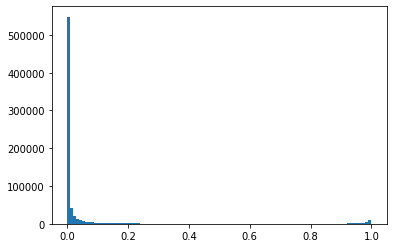

In [51]:
a = plt.hist(sub_df[all_ich].values.reshape(-1), bins=100)

In [10]:
sub_df.describe()

,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
count,1.212320e+05,1.212320e+05,1.212320e+05,1.212320e+05,1.212320e+05,1.212320e+05
mean,1.560661e-01,3.511702e-03,4.928764e-02,3.992617e-02,5.057000e-02,6.751575e-02
std,3.155650e-01,2.340146e-02,1.834697e-01,1.717131e-01,1.596374e-01,1.943539e-01
min,6.395225e-11,2.467410e-30,8.247374e-18,2.860137e-26,1.333942e-17,2.300857e-12
25%,1.127982e-03,2.080348e-05,1.098149e-04,1.049839e-05,2.775442e-04,4.491036e-04
50%,7.046436e-03,1.439424e-04,8.773885e-04,1.644268e-04,1.749780e-03,2.900703e-03
75%,6.932104e-02,8.703309e-04,6.679624e-03,1.949211e-03,1.612395e-02,1.970657e-02
max,9.999369e-01,9.287832e-01,9.993688e-01,9.990603e-01,9.986540e-01,9.976121e-01


In [20]:
M/0.001

34538.77639491069

In [21]:
16.353/M

0.4734678441709251

In [22]:
N = 455
for s in scores:
    print(N, s, np.ceil(N*s/M), M*np.ceil(N*s/M)/N)


455 13.837 183.0 13.89141995663441
455 16.353 216.0 16.39643011274881
455 18.185 240.0 18.218255680832016


In [ ]:
#18.185 - all ones
#16.353 - all zero
#13.837 - step towards all zero, th 0.8
#0.000  - th 0.5, class 2 to zero

In [53]:
13.837 / 18.185

0.7609018421776189

In [45]:
16.353 - 13.837

2.516000000000002

In [46]:
18.185 - 16.353

1.8319999999999972

In [63]:
(7/12)*(13.837/M)

0.23369627345926144

In [65]:
np.log(2)*16.353/M

0.32818290127287225

In [ ]:
# random weighting per sample?

In [72]:
scores/scores[2]

array([0.76090184, 0.89925763, 1.        ])

In [ ]:
#40% is weight of one image

In [76]:
16.353/18.185 #(9:10)

0.8992576299147651

In [88]:
0.01*727392

M = 15*np.log(10)

scores = [13.837, 16.353, 18.185, 0.014, 15.164]
#scores = np.array([13.837, 16.353, 18.185])

N = 6959
for s in scores:
    print(N, s, np.ceil(N*s/M), M*np.ceil(N*s/M)/N)

for N in range(7,10000,7):
    failed = False
    for s in scores:
        if M*np.ceil(N*s/M)/N - s >= 0.001: failed=True
    if not failed:
        print(N)

6959 13.837 2788.0 13.837348554247882
6959 16.353 3295.0 16.353681307836002
6959 18.185 3664.0 18.18509508707469
6959 0.014 3.0 0.01488954292063976
6959 15.164 3056.0 15.167481055158367
9240


In [25]:
import numpy as np
from math import log

def search_num(value):
    for i in range(1, 100):
        num = i*7
        for j in range(num):
            corr, error = j, num - j
            result = (-log(1-(1e-15))*corr + (-log(1e-15))*error)/(corr + error)
            if result >= value and result < value + 0.001:
                print(int(num/7), corr, error, result)
    print('*'*10)
search_num(16.353)
search_num(18.185)
search_num(13.837)

35 129 116 16.35305331350873
70 258 232 16.35305331350873
**********
35 116 129 18.185723081401953
70 232 258 18.185723081401953
**********
**********


In [24]:
35*7

245